In [1]:
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List
import os 

In [2]:
folder_path = "Evaluation_CSV"

In [3]:
all_files = os.listdir(folder_path)

In [4]:
def compute_rouge_l(candidate, reference):
    m, n = len(candidate), len(reference)
    print(m,n)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if candidate[i - 1] == reference[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])
    
    return dp_table[m][n] / n

In [5]:
csv_files = [file for file in all_files if file.endswith('.csv')]


In [9]:

total_average_rouge_l_scores = []
num_labels = []
count = 0 
for csv_file in csv_files:

    count += 10
    num_labels.append(count)

    df = pd.read_csv(csv_file)
    rouge_l_scores = [] 

    for idx, row in df.iterrows():
        answer = row['answer']
        syntheses = row['syntheses'] 
        
        rouge_l_score = compute_rouge_l(answer, syntheses)
        rouge_l_scores.append(rouge_l_score)
        print(f"ROUGE-L score: {rouge_l_score:.4f}")
    total_average_rouge_l_score = sum(rouge_l_scores)/len(rouge_l_scores)
    total_average_rouge_l_scores.append(total_average_rouge_l_score)

8 8
ROUGE-L score: 1.0000
5 5
ROUGE-L score: 1.0000
196 160
ROUGE-L score: 0.4313
295 175
ROUGE-L score: 0.6171
48 48
ROUGE-L score: 0.9792
109 57
ROUGE-L score: 0.6667
245 155
ROUGE-L score: 0.6968
139 85
ROUGE-L score: 0.6118
5 5
ROUGE-L score: 0.6000
4 4
ROUGE-L score: 1.0000
4 5
ROUGE-L score: 0.2000
5 5
ROUGE-L score: 0.4000
4 4
ROUGE-L score: 0.2500
124 79
ROUGE-L score: 0.8481
126 58
ROUGE-L score: 0.5690
1 6
ROUGE-L score: 0.1667
49 402
ROUGE-L score: 0.0920
5 5
ROUGE-L score: 0.2000
5 5
ROUGE-L score: 0.2000
5 5
ROUGE-L score: 0.6000
9 6
ROUGE-L score: 1.0000
8 7
ROUGE-L score: 0.7143
372 129
ROUGE-L score: 0.7054
107 67
ROUGE-L score: 0.8358
338 542
ROUGE-L score: 0.3616
71 148
ROUGE-L score: 0.3108
71 62
ROUGE-L score: 0.4516
73 124
ROUGE-L score: 0.2903
43 14
ROUGE-L score: 0.5000
47 6
ROUGE-L score: 0.5000
4 5
ROUGE-L score: 0.4000
176 131
ROUGE-L score: 0.5573
473 531
ROUGE-L score: 0.8851
152 196
ROUGE-L score: 0.3316
135 250
ROUGE-L score: 0.3160
57 6
ROUGE-L score: 0.1

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


Text(0.5, 1.0, 'ROUGE-L Scores Comparison')

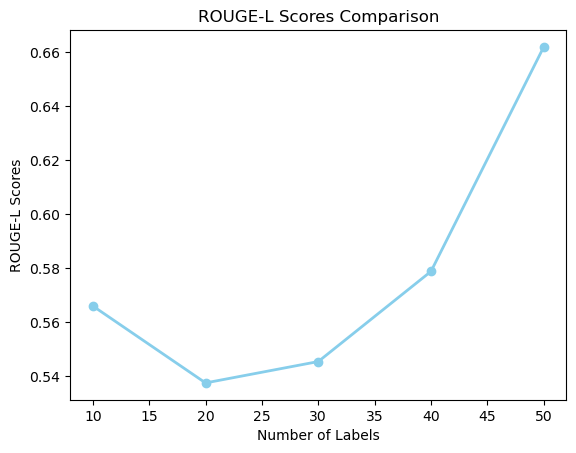

In [20]:
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('ROUGE-L Scores')
plt.title('ROUGE-L Scores Comparison')
